# Convolutional Neural Networks and Computer Vision with TensorFlow

In [1]:
import datetime
print(f"Notebook last run on: {datetime.datetime.now()}")

Notebook last run on: 2024-10-26 17:22:36.172226


## Get the data

In [2]:
import zipfile
import requests
import os

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"

# Download the file
response = requests.get(url)

zip_file_path = "pizza_steak.zip"
with open(zip_file_path, 'wb') as file:
    file.write(response.content)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("datasets")
    print("Extracted Successfully!")

os.remove(zip_file_path)
print("Remove the zip fodler")

Extracted Successfully!
Remove the zip fodler


In [3]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("datasets/pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.'")
    print("\n")

There are 2 directories and 0 images in 'datasets/pizza_steak.'


There are 2 directories and 0 images in 'datasets/pizza_steak\test.'


There are 0 directories and 250 images in 'datasets/pizza_steak\test\pizza.'


There are 0 directories and 250 images in 'datasets/pizza_steak\test\steak.'


There are 2 directories and 0 images in 'datasets/pizza_steak\train.'


There are 0 directories and 750 images in 'datasets/pizza_steak\train\pizza.'


There are 0 directories and 750 images in 'datasets/pizza_steak\train\steak.'




In [4]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("datasets/pizza_steak/train/steak"))

num_steak_images_train

750

In [5]:
# get the class names programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("datasets/pizza_steak/train/") # turn our training path into a python path
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from the subdirectories

class_names

array(['pizza', 'steak'], dtype='<U5')

## Let's visualize some images

In [6]:
# View an image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0]) # example random image --->['2965021.jpg'] img is at index 0
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape} ") # show the shape of the image

    return img

Image shape: (512, 512, 3) 


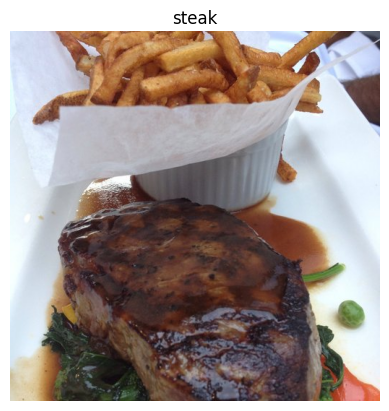

In [7]:
# View the random image from the training dataset
img = view_random_image(target_dir="datasets/pizza_steak/train/",
                       target_class="steak")

In [8]:
type(img)

numpy.ndarray

In [9]:
(img / 255.).min(),  (img / 255.).max()

(0.0, 1.0)

## Component of a CNN:

* Input image(s) - Target images we'd like to discover patterns in
* Input layer - Takesin target images and preprocess them for further layers
* Convolutional layer - Exracts/learns the most important features from target images
* Hidden activation - Adds non-linearity to learned features (non-straight lines)
* Pooling layer - Reduces the dimensionality of learned image features
* Fully connected layer - Further refines learned features from convolutional layers
* Output layer - Takes learned features and outputs them in shape of target labels
* Output activation - Adds non-linearity to output layer

## Train a model

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess data ( get all hte pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup  the train and test dirs
train_dir = "datasets/pizza_steak/train/"
test_dir = "datasets/pizza_steak/test/"

# Import data from dirs and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=50,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              shuffle=True) # type of problem we're working on

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=50,
                                              target_size=(224, 224),
                                              class_mode='binary')

# Create a CNN model
model_1 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    keras.layers.Conv2D(filters=10,
                       kernel_size=3, # can also be (3, 3)
                       activation='relu'),
    keras.layers.Conv2D(10, 3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=2, # pool_size can alos be (2, 2)
                          padding='valid'), # padding can also be 'same'
    keras.layers.Conv2D(10, 3, activation='relu'),
    keras.layers.Conv2D(10, 3, activation='relu'), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid') # binary activation output
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Adjust steps per epoch to match the size of the dataset
steps_per_epoch = len(train_data)
validation_steps = len(valid_data)

print(f"Steps per epoch: {steps_per_epoch}.")
print(f"Validation steps per epoch: {validation_steps}")

# Fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       validation_data=valid_data)

Steps per epoch: 30.
Validation steps per epoch: 10
Epoch 1/5


C:\Users\Jamshid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.5146 - loss: 0.6903 - val_accuracy: 0.7140 - val_loss: 0.5601
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.7258 - loss: 0.5498 - val_accuracy: 0.7760 - val_loss: 0.4628
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.7943 - loss: 0.4722 - val_accuracy: 0.8480 - val_loss: 0.3554
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.8287 - loss: 0.4185 - val_accuracy: 0.8320 - val_loss: 0.3836
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.8360 - loss: 0.3930 - val_accuracy: 0.7420 - val_loss: 0.4698


In [27]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Note: Adding extra layers or increasing the number of neurons in each layer is often referred to as inreasing the Complexity of out model

In [28]:
# Create a model similar to model_1 but add an extra layer and increase the number of hidden units each layer
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)), # Dense layers expect a 1-dimensional vector as input
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       validation_data=valid_data)

Epoch 1/5


C:\Users\Jamshid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.5436 - loss: 4.5263 - val_accuracy: 0.7300 - val_loss: 0.6058
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.6594 - loss: 1.0869 - val_accuracy: 0.5880 - val_loss: 1.0258
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.7049 - loss: 0.6917 - val_accuracy: 0.7100 - val_loss: 0.5804
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.7189 - loss: 0.6384 - val_accuracy: 0.7880 - val_loss: 0.4629
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.8019 - loss: 0.4727 - val_accuracy: 0.7980 - val_loss: 0.4378


In [29]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

### The number of trainable parameters has increased even more than `model_1`. And even close to 500x more trainable parameters, model 2 still does not outperform model 1

### This goes to show the power of CNNs and their ability to learn patterns despite using less parameters

## Make the creating of our model a little easier

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Input
from tensorflow.keras import Sequential

In [35]:
# Create the model (this canm be our baseline, a 3 layer CNN)
model_3 = Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding='valid',
          activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

### And it follows the typical CNN structure of:
`Input -> Conv + ReLU layers (`mnon-linearities) -> Pooling layer -> Fully connected (dense layer) as Output`

In [38]:
# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [40]:
# Check lengths of training and test data generators
len(train_data), len(valid_data)

(30, 10)

In [43]:
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        validation_data=valid_data)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.5857 - loss: 0.9151 - val_accuracy: 0.7560 - val_loss: 0.5547
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.7863 - loss: 0.4945 - val_accuracy: 0.8280 - val_loss: 0.3853
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.8470 - loss: 0.3750 - val_accuracy: 0.8500 - val_loss: 0.3499
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.8693 - loss: 0.3122 - val_accuracy: 0.8580 - val_loss: 0.3367
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.9139 - loss: 0.2282 - val_accuracy: 0.8520 - val_loss: 0.3488


# Evaluate the model

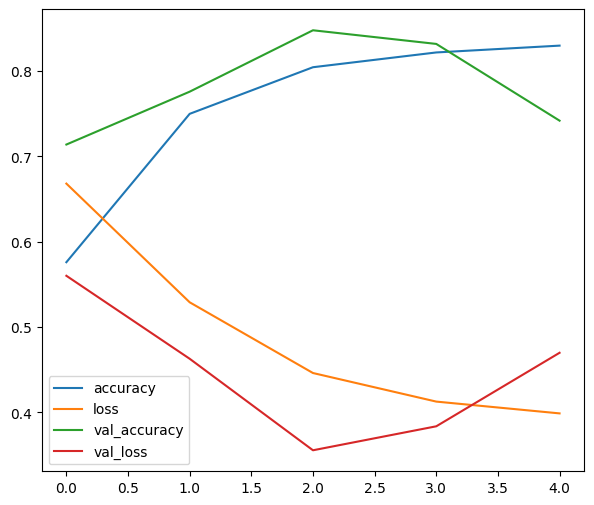

In [56]:
# Plot the training curves
# Model 1
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(7, 6));

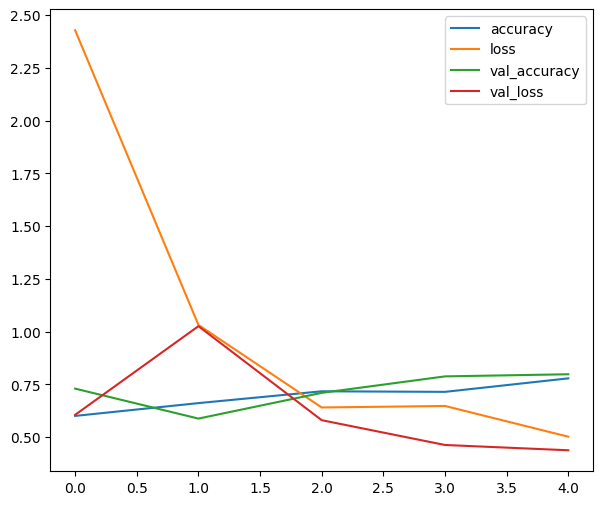

In [57]:
# Model 2 plotting loss curves
pd.DataFrame(history_2.history).plot(figsize=(7, 6));

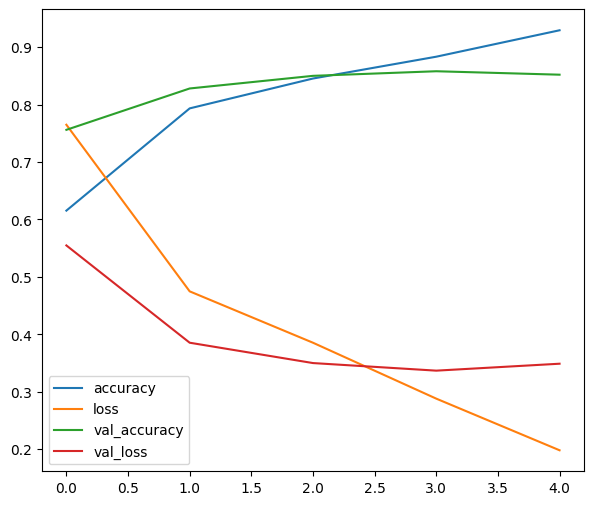

In [58]:
# Model 3 plottin loss curves
pd.DataFrame(history_3.history).plot(figsize=(7, 6));

## To further inspect out model's training preformance, let's sepearat the accuracy and loss curves

In [61]:
history_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [67]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, acc, label="Training acc")
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Accuracy')
    plt.xlabel("Epochs")
    plt.legend();

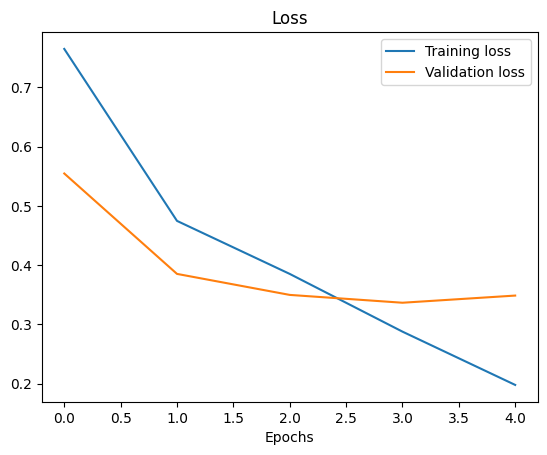

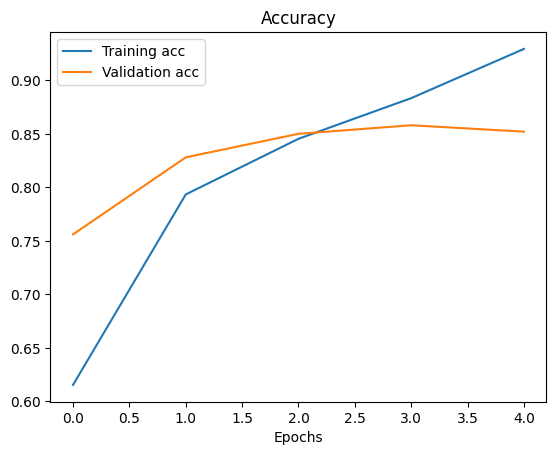

In [68]:
plot_loss_curves(history_3)

### The ideal position for these two to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training and the validation curves, it means the model is probably overfitting.

In [70]:
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

# Adjust the model parameters

> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layers) as Output

In [73]:
# A 3 layer CNN
model_4 = Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2), # Reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile model 
model_4.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

In [76]:
history_4 = model_4.fit(train_data,
                       epochs=5,
                       validation_data=valid_data)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.5775 - loss: 0.6754 - val_accuracy: 0.7080 - val_loss: 0.5539
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.7209 - loss: 0.5432 - val_accuracy: 0.7920 - val_loss: 0.4440
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.8008 - loss: 0.4552 - val_accuracy: 0.8340 - val_loss: 0.3745
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.8032 - loss: 0.4095 - val_accuracy: 0.8500 - val_loss: 0.3517
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8342 - loss: 0.3799 - val_accuracy: 0.8480 - val_loss: 0.3608


In [77]:
model_4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

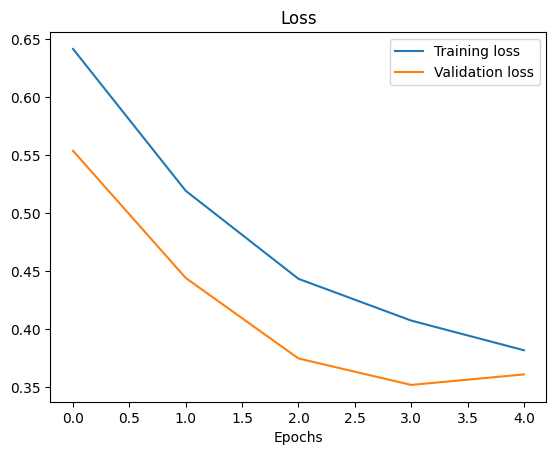

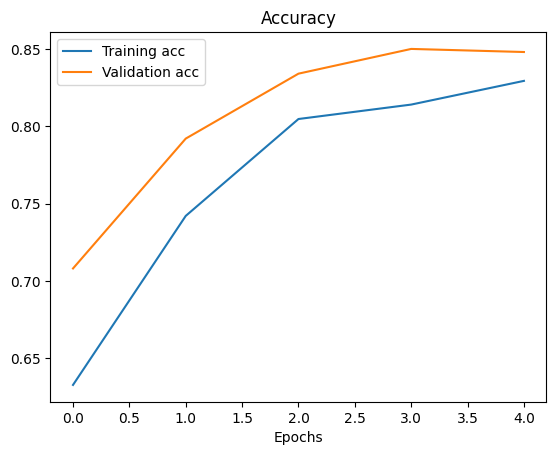

In [78]:
plot_loss_curves(history_4)

## Let's implement Data augmentation now
To implement data augmentation, we'll have to reinstantiate our `ImageDataGenerator`

In [79]:
# Crate ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=20, # rotate the image slightly between 0 and 20 degrees
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2, # shift the image width ways
                                            height_shift_range=0.2, # shift the image height ways
                                            horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [104]:
# Import data and augment it from directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=50,
                                                                  class_mode='binary',
                                                                  shuffle=True)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=50,
                                              class_mode='binary',
                                              shuffle=True)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=50,
                                            class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


## Visulize

In [105]:
# get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # labels aren't augmented, they stay the same

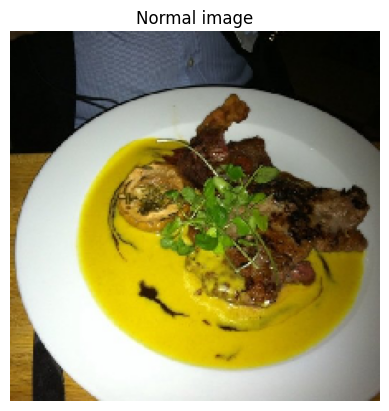

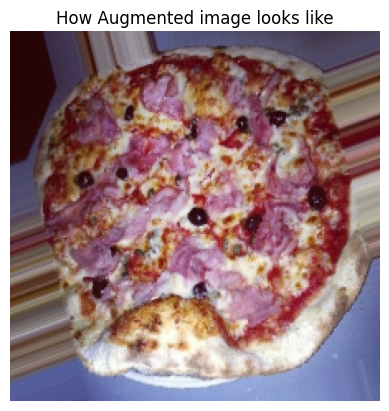

In [119]:
# Show original image and augmented image
random_number = random.randint(0, 49) # we're making batches of 50, so we'll get a random instance.
plt.imshow(images[random_number])
plt.title(f"Normal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"How Augmented image looks like")
plt.axis(False);

In [120]:
# As we've shuffled the images, we are getting different images.

## Building the model with augemented data

In [128]:
# Build a model
model_5 = Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

In [129]:
# Fit the model
history_5 = model_5.fit(train_data_augmented,
                       epochs=15,
                       validation_data=test_data)

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.5659 - loss: 0.6830 - val_accuracy: 0.7440 - val_loss: 0.5523
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 329ms/step - accuracy: 0.6788 - loss: 0.6130 - val_accuracy: 0.8000 - val_loss: 0.5023
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.7146 - loss: 0.5737 - val_accuracy: 0.8200 - val_loss: 0.4341
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - accuracy: 0.7470 - loss: 0.5140 - val_accuracy: 0.8520 - val_loss: 0.3852
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 0.7724 - loss: 0.4812 - val_accuracy: 0.8660 - val_loss: 0.3503
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 0.7759 - loss: 0.4826 - val_accuracy: 0.8300 - val_loss: 0.3970
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 332ms/step - accuracy: 0.7761 - loss: 0.4617 - val_accuracy: 0.8660 - val_loss: 0.3342
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - accuracy: 0.7848 - loss: 0.4494 - val_accu

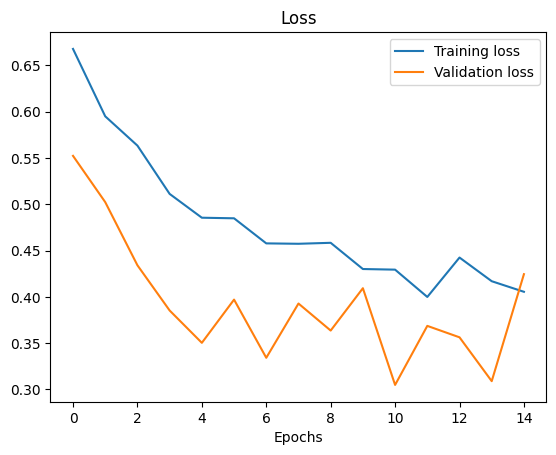

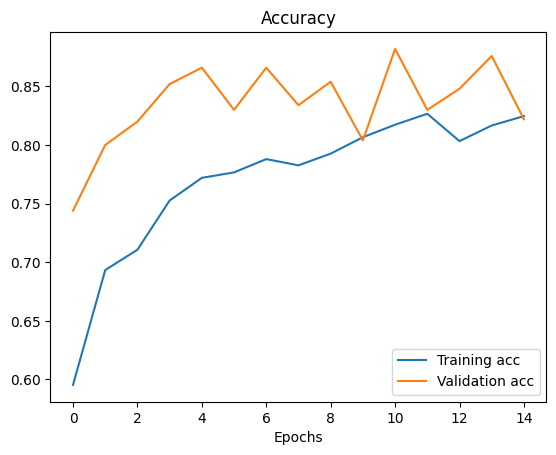

In [130]:
# plot the model's performance history
plot_loss_curves(history_5)

In [133]:
# Create a CNN model ( Same as Tiny VGG but for binary classification)
model_6 = Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [134]:
history_6 = model_6.fit(train_data_augmented,
                       epochs=5,
                       validation_data=test_data)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 369ms/step - accuracy: 0.5302 - loss: 0.7239 - val_accuracy: 0.5000 - val_loss: 0.6855
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - accuracy: 0.5120 - loss: 0.6803 - val_accuracy: 0.6000 - val_loss: 0.6445
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - accuracy: 0.6455 - loss: 0.6339 - val_accuracy: 0.7340 - val_loss: 0.4961
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 0.6964 - loss: 0.5720 - val_accuracy: 0.7980 - val_loss: 0.4521
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.7463 - loss: 0.5248 - val_accuracy: 0.7380 - val_loss: 0.4915


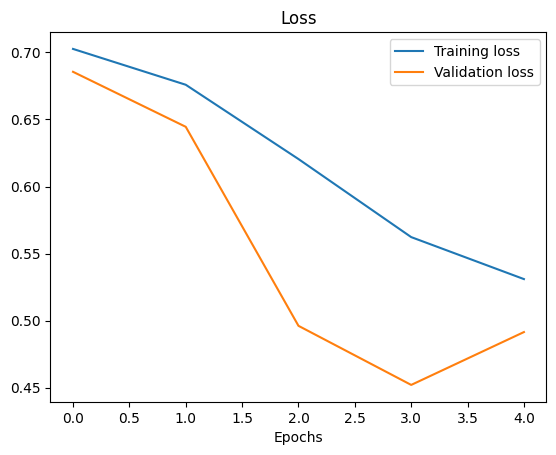

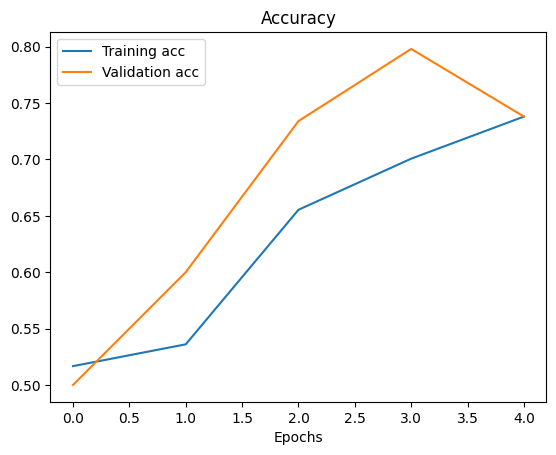

In [135]:
# Plot loss curves
plot_loss_curves(history_6)

In [136]:
model_6.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# Making predictions with our trained model

In [137]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [141]:
import requests

url = "https://www.shutterstock.com/image-photo/bbq-grilled-wagyu-new-york-600nw-2458324883.jpg"

def download_image(img_link: str, img_name: str) -> str:
    response = requests.get(img_link)
    save_image = "datasets/test_images/{}.jpg".format(img_name)

    with open(save_image, 'wb') as file:
        file.write(response.content)
        print("downloaded and saved the image successfully!")
    return save_image
down_image = download_image(img_link=url, img_name='steak')
down_image

downloaded and saved the image successfully!


'datasets/test_images/steak.jpg'

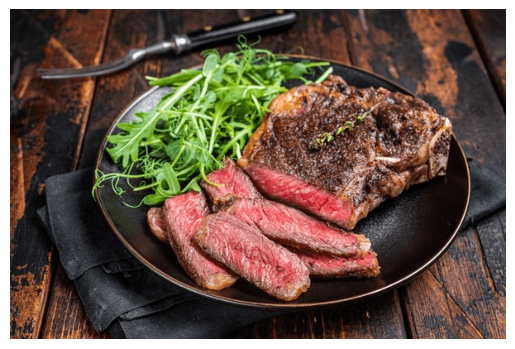

In [145]:
steak = mpimg.imread(down_image)
plt.imshow(steak)
plt.axis(False);

In [146]:
steak.shape

(399, 600, 3)

In [147]:
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it
    to (img_shape, img_shape, color_channel).
    """
    # Read in target file ( an image )
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 color channels
    img = tf.image.decode_image(img, channels=3)

    # Resize the image ( to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # rescale the image ( get all values between 0 and 1)
    img = img/255.
    return img

In [168]:
steak = load_and_prep_image(down_image)
steak.ndim

3

In [169]:
# Add an extra axis for a batch size
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # Add an extra dimension at axis 0
# Steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'

print(f"Shape after new dimension: {steak.shape}")
steak.ndim

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


4

In [185]:
# Make a prediction on custom image tensor
pred = model_5.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.98015857]], dtype=float32)

In [186]:
# indexing the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

## Multi-class Classification

## 1. Import and become one with tha data

In [188]:
import zipfile

dataset_link = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"

zip_file_path = "10_food_classes.zip"

response = requests.get(dataset_link)

with open(zip_file_path, 'wb') as file:
    file.write(response.content)
    print("Zip folder downloaded successfully!")

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('datasets')
    print("Extracted successfully!")

os.remove(zip_file_path)
print("Remove zip folder")

Zip folder downloaded successfully!
Extracted successfully!
Remove zip folder


In [189]:
import os

# Walk through 10 food classes dir and list number of files

for dirpath, dirnames, filenames in os.walk("datasets/10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'datasets/10_food_classes_all_data'.
There are 10 directories and 0 images in 'datasets/10_food_classes_all_data\test'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data\test\

In [190]:
## We'll now setup training and test directory paths.

train_dir = "datasets/10_food_classes_all_data/train/"
test_dir = "datasets/10_food_classes_all_data/test/"

In [191]:
# get the class names for our multi-class dataset
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3) 


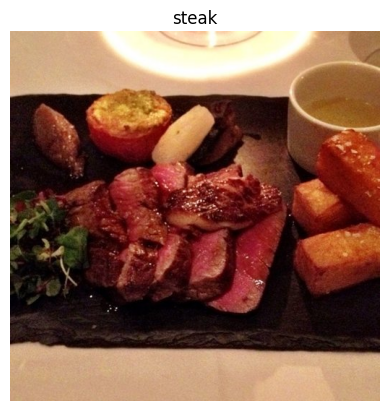

In [195]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names)) # get a random class name

## 2. Preprocess the data ( prepare it for a model

In [197]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True) # change to categorical for multi-class data

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Data Augmentation

In [199]:
# Create data augmented data generator instance
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                      rotation_range=20,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                      target_size=(224, 224),
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      shuffle=True)

Found 7500 images belonging to 10 classes.


In [203]:
# Try a simplified model (removed two layers)
model_17 = Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the cloned model (same setup architecture)
model_7.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_aug, # use augmented data
                       epochs=5,
                       validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 207ms/step - accuracy: 0.3312 - loss: 1.9188 - val_accuracy: 0.3944 - val_loss: 1.7860
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 203ms/step - accuracy: 0.3499 - loss: 1.9074 - val_accuracy: 0.3948 - val_loss: 1.7316
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 204ms/step - accuracy: 0.3593 - loss: 1.8720 - val_accuracy: 0.4260 - val_loss: 1.7104
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 204ms/step - accuracy: 0.3635 - loss: 1.8435 - val_accuracy: 0.4352 - val_loss: 1.6646
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 204ms/step - accuracy: 0.3743 - loss: 1.8249 - val_accuracy: 0.3932 - val_loss: 1.7454


In [256]:
model_7.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

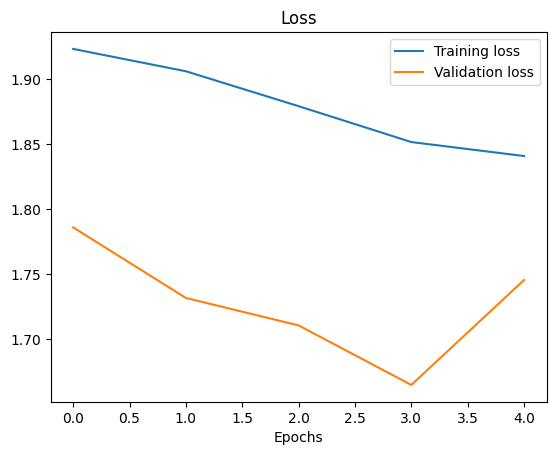

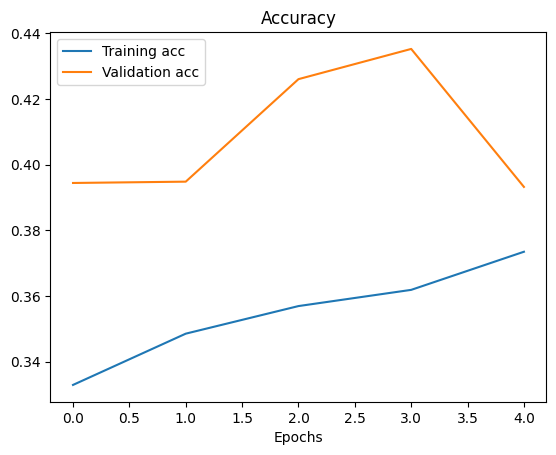

In [204]:
# Check out the loss curves of model_7
plot_loss_curves(history_7)

In [209]:
# Building a complex model

from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
model_8 = Sequential([
    keras.layers.Input(shape=(224, 224, 3)),

    # first Convolutional Block
    Conv2D(32, 3, activation='relu'),
    BatchNormalization(),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, 3, activation='relu'),
    BatchNormalization(),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Dropout(0.25),

    # Third convolutional Block
    Conv2D(128, 3, activation='relu'),
    BatchNormalization(),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(),
    Dropout(0.25),

    # Global Average pooling instead of Flatten
    GlobalAveragePooling2D(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the cloned model (same setup architecture)
model_8.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_aug, # use augmented data
                       epochs=7,
                       validation_data=test_data)

Epoch 1/7
235/235 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.1590 - loss: 2.3317 - val_accuracy: 0.1824 - val_loss: 2.2621
Epoch 2/7
235/235 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.2123 - loss: 2.1503 - val_accuracy: 0.2844 - val_loss: 2.0598
Epoch 3/7
235/235 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.2581 - loss: 2.0968 - val_accuracy: 0.2712 - val_loss: 2.0885
Epoch 4/7
235/235 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.3148 - loss: 1.9853 - val_accuracy: 0.3568 - val_loss: 1.9077
Epoch 5/7
235/235 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.3467 - loss: 1.8924 - val_accuracy: 0.3608 - val_loss: 1.9303
Epoch 6/7
235/235 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.3737 - loss: 1.8585 - val_accuracy: 0.1996 - val_loss: 2.8223
Epoch 7/7
235/235 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.4031 - loss: 1.7895 - val_accuracy: 0.3772 - val_loss: 2.0428


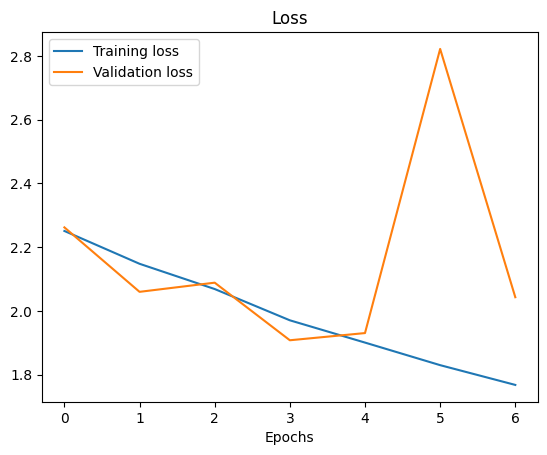

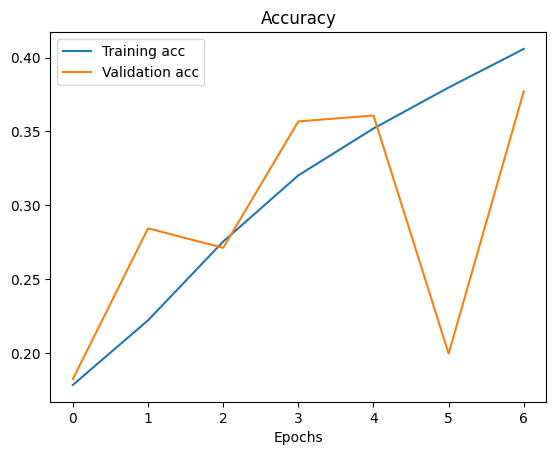

In [212]:
# Check out the loss curves of model_8
plot_loss_curves(history_8)

## Making a prediction with our trained mode

In [213]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [214]:
internet_images = [] # to store donlaode image file paths

In [215]:
internet_images.append(download_image(img_link="https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/M6HASPARCZHYNN4XTUYT7H6PTE.jpg", img_name="hamburger"))
internet_images.append(download_image(img_link="https://imgcdn.stablediffusionweb.com/2024/10/15/669195ff-dc7f-41f8-a44d-9f5bb6d672e6.jpg", img_name="ice_cream"))
internet_images.append(download_image(img_link="https://fusedbyfionauyema.com/wp-content/uploads/2021/02/Fused-by-Fiona-Uyema-Sushi-Q-A-how-to-make-sushi-at-home.jpg", img_name="sushi"))
internet_images.append(download_image(img_link="https://www.allrecipes.com/thmb/3cixVDmAtbb2hYxoFLVJ4VPQ7rA=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/143809-best-steak-marinade-in-existence-ARMag-1x1-1-8105b6b8e5cb4931ba8061f0425243dd.jpg", img_name="steak"))
internet_images.append(download_image(img_link="https://images.getrecipekit.com/20220904015448-veg-20fried-20rice.png?aspect_ratio=16:9&quality=90&", img_name="fried_rice"))

downloaded and saved the image successfully!
downloaded and saved the image successfully!
downloaded and saved the image successfully!
downloaded and saved the image successfully!
downloaded and saved the image successfully!


In [216]:
internet_images

['datasets/test_images/hamburger.jpg',
 'datasets/test_images/ice_cream.jpg',
 'datasets/test_images/sushi.jpg',
 'datasets/test_images/steak.jpg',
 'datasets/test_images/fried_rice.jpg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']
[[0.03752548 0.00302323 0.04012262 0.30940145 0.04763319 0.02012408
  0.04788822 0.3630782  0.04662522 0.08457834]]


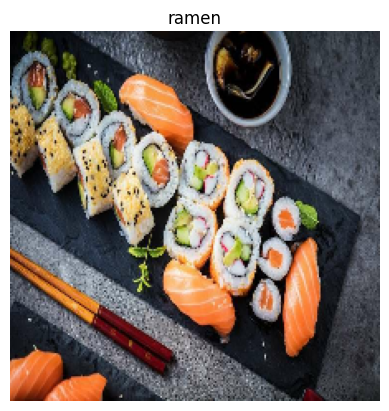

In [240]:
# Make a prediction using model_8
# Load in and preprocess our custom images
img = load_and_prep_image(random.choice(internet_images))

# make a prediction
pred = model_8.predict(tf.expand_dims(img, axis=0))
print(class_names)
print(pred)

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [245]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with a trained model and plots the image with the predicted class as the title..
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    print(pred)

    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.0412616  0.02339697 0.13360396 0.18155278 0.08209778 0.0238777
  0.14342757 0.13536933 0.17988408 0.05552816]]


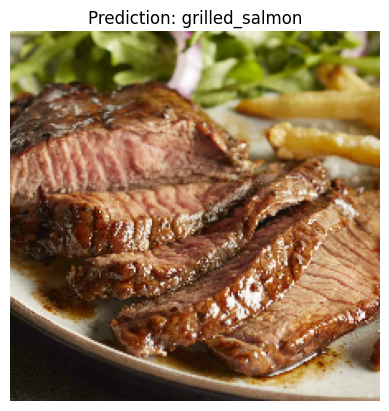

In [250]:
pred_and_plot(model_8, filename=internet_images[3], class_names=class_names)

In [251]:
# Wrong predictions as the model was not well trained

In [252]:
model_8.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 108, 108, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 106, 106, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 51, 51, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 916,224 (3.50 MB)

 Trainable params: 305,258 (1.16 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 610,518 (2.33 MB)

## We'll see how to improve the model accuracy later on (spolier: transfer learning is going to step things up a notch).

# Saving and loading our model

In [254]:
# save a model
model_8.save("models/saved_trained_model.keras")

In [255]:
# Load in a model and evaluate it
loaded_model_8 = tf.keras.models.load_model("models/saved_trained_model.keras")
loaded_model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.3601 - loss: 1.9644


[2.0428459644317627, 0.37720000743865967]

In [257]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.3601 - loss: 1.9644


[2.0428459644317627, 0.37720000743865967]

In [258]:
[2.0428459644317627, 0.37720000743865967] == [2.0428459644317627, 0.37720000743865967]

True